In [ ]:
!pip install Textblob &> /dev/null
!pip install -U tomotopy &> /dev/null
!pip install -U pyldavis==2.1.2 &> /dev/null
!pip install -U gensim &> /dev/null

# TextBlob
*  extremely powerful NLP library for Python
*  Tokenization (splitting  a large paragraph into sentences or words) and lemmatization (reducing the word to its root form) can be conducted.
*  For lemmatization: use Word function, and .lemmatize() attribute function
*  Parts of Speech(POS) tagging is also possible via .tags attribute
*  Converting into lowercases


In [ ]:
import pandas as pd
import re
import pprint as pp

import nltk
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
from nltk.corpus import stopwords
from textblob import TextBlob, Word

nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

pd.options.display.max_colwidth = -1

%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Mounting Google Drive

In [ ]:
from google.colab import drive # mount Google Drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Reading and Checking Data

In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/AI/project/second/NYTDATA_lem_2019-09-01_2021-01-31.csv', encoding='utf-8')

DF.head()

,Title,Url,text_lemmatized,Date
0,The Gillibrand Test Case for Women in Politics,https://www.nytimes.com/2019/09/01/us/politics/kirsten-gillibrand-democrats-feminists.html,argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit proxy percent population woman woman woman campaign field woman basketball team minimize use sport metaphor politic candidacy offering message field course explanation gillibrand candidacy catch fire majority contender campaign cash woe miscalculation pack message study woman politic test case way woman president obstacle face field contender candidate race voter woman leader campaign referendum gender equity field case break choice abound woman woman candidate man thing cycle choice leader head woman group gillibrand decade icon race woman talk gender time life candidate degree experience woman politic center appeal voter child care policy context history quality child care mom one gender pay gap headline signature issue gillibrand campaign trail woman issue want talk economy campaign event summer woman issue issue woman issue talk woman politic job people win deal woman campaign platform candidacy focus family mother child people kid reference child book suffragist gillibrand event abortion right reporter abortion ban debate topic issue gender dynamic right candidate analysis woman study woman politics moment other credential campaign traction strategist woman power question break environment woman issue woman voter breakthrough tresa pollster survey gender issue discussion fairness power currency year voter term group word gillibrand message distinguish audience activist junkie twist race woman candidate issue abortion candidate campaign gillibrand connect range voter debate seize spotlight vice child tax credit traction attack win message bit head people leader woman race attack character gillibrand push charge reputation politician colleague professor candidate criticism fact sexism issue gillibrand detriment gillibrand question colleague allegation harassment step fact aide gillibrand credit blame caucus activist address group wing feeling question decision push resignation blame man woman space factor gillibrand campaign candidate backlash profile man gender power dynamic woman woman power man gillibrand run candidate gillibrand world woman view thing right woman video decision drop race time effort brand campaign lot woman lot man expert guy year,2019-09-01
1,Why Some Labor Unions Are Holding Back on 2020 Endorsements,https://www.nytimes.com/2019/09/01/us/politics/2020-democrats-labor-unions-endorsements.html,billionaire class percent union voting record participation picket line campaign sander union member activist conference call evening movement country line defense power member component worker effort sander labor nomination activity rolling plan labor worker pickup truck fist endorsement member show support union sander response union candidate year legislature power union percent democrat union seal validation endorsement union member role voter poll union member candidate address grievance desire president trump harness challenge candidate endorsement percentage point voter household exit poll margin point advantage president barack election lesson democrat candidate understand talk issue people breakfast table economic worker worker candidate union leader recognition gain union backing candidate rank file timetable union organization worker time field month candidate court union leader table discussion member picket line clamber affinity worker candidate labor issue strategist labor union employee advantage egg basket win meantime vale lot opportunity membership candidate opportunity benefit union campaign union leader member process candidate chance appeal worker vote grab sander email list highlight organizing effort support union member supporter worker country vice speech campaign teamster hall audience fire fighter labor leader security wo

In [ ]:
print(len(DF))

CONTENT = DF['text_lemmatized']

8864


# Lemmatization, Tokenizing, and Pos Tagging

In [ ]:
## Lemmatization, preprocessing, and POS tagging

POS = ['NN','NNP'] # 일반명사, 고유명사
                         #https://www.geeksforgeeks.org/python-part-of-speech-tagging-using-textblob/

stop_words = stopwords.words('english')
stops = ['percent', 'time', 'group', 'rate', 'place', 'number', 'thing', 'dollar', 'decade', 'area', 'point', 'example', 'said', 'line', 'step', 'side', 'wednesday', 'april', 'year']
stop_words.extend(stops)
stop_words = set(stop_words) # 추가된 불용어에서 중복 제거

def TB_lemmatization(texts):
    # 위에서 트윗 전처리 단계와 동일
    lemma_all = [] # 전체 lemmatization된 결과 저장하는 변수
    words = [] # 개별 lemmatization된 결과 저장하는 변수(이후 위와 동일하게 빈 공간 처리)
    for doc in texts:
        doc = " ".join([Word(word).lemmatize("n") for word in doc.split()]) # Word: Textblob에서 Wordnet 함수를 활용하여 전처리하기 위한 펑션 / lemmatize("n") Word() 안에 들어가는 단어가 명사일 경우 lemmatize 처리
        doc = TextBlob(doc)                                                  # NLTK, Wordnet을 기반으로 하여 텍스트 처리를 수월하게 할 수 있도록 다양한 기능을 많이 포함

        for word, tag in doc.tags:
            if(len(word) < 4 or word.lower() in stop_words): # manually 추가한 stopword는 소문자이기 때문에 .lower()를 통해 소문자 처리한 단어를 검사할 수 있도록 지정
                continue
            if tag in POS:
                words.append(word)

        words = " ".join(words).lower() # POS에 해당하는 단어들을 소문자처리하여 " " 단위로 묶음
        lemma_all.append(words)
        words = []

    return lemma_all

CONTENT_PREP = TB_lemmatization(DF['text_lemmatized'])

In [ ]:
CONTENT_PREP[0]

'argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit population woman woman woman campaign field woman basketball team minimize sport metaphor candidacy field course explanation gillibrand candidacy fire majority campaign cash miscalculation pack message study woman test case woman president field contender candidate race voter woman leader campaign referendum gender equity field case choice woman woman candidate cycle choice leader head woman gillibrand icon race woman gender life experience woman center appeal voter child care policy context history quality child care gender headline signature issue campaign trail woman issue talk economy campaign event summer woman issue issue woman issue talk woman woman campaign platform candidacy family mother child reference child book suffragist gillibrand event abortion reporter abortion debate topic issue candidate analysis woman woman moment campaign traction strategist woman power question brea

*  Organizing time periods
*  You don't have to process this, Just ingore it this time

In [ ]:
# DF['Year'] = DF['Time'].str.split(',').str[1] # DF['Date']의 값이 mm dd, yyyy로 구성되어 있는데 , 단위로 분리한 뒤 두번째 값만 저장
# DF['Year'] = DF['Year'].str.split(' ').str[1] # 이후 ' yyyy HH:MM am'로 구성되어 제거되지 않는 부분이 있어 첫번째 space 처리 후 두번째 값인 yyyy 만 저장
# DF['Year'] = DF['Year'].str.replace('Updated', '')

# Adding 'Allwords' as New Variable into Data

In [ ]:
DF['Allwords'] = CONTENT_PREP

DF.head()

,Title,Url,text_lemmatized,Date,Allwords
0,The Gillibrand Test Case for Women in Politics,https://www.nytimes.com/2019/09/01/us/politics/kirsten-gillibrand-democrats-feminists.html,argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit proxy percent population woman woman woman campaign field woman basketball team minimize use sport metaphor politic candidacy offering message field course explanation gillibrand candidacy catch fire majority contender campaign cash woe miscalculation pack message study woman politic test case way woman president obstacle face field contender candidate race voter woman leader campaign referendum gender equity field case break choice abound woman woman candidate man thing cycle choice leader head woman group gillibrand decade icon race woman talk gender time life candidate degree experience woman politic center appeal voter child care policy context history quality child care mom one gender pay gap headline signature issue gillibrand campaign trail woman issue want talk economy campaign event summer woman issue issue woman issue talk woman politic job people win deal woman campaign platform candidacy focus family mother child people kid reference child book suffragist gillibrand event abortion right reporter abortion ban debate topic issue gender dynamic right candidate analysis woman study woman politics moment other credential campaign traction strategist woman power question break environment woman issue woman voter breakthrough tresa pollster survey gender issue discussion fairness power currency year voter term group word gillibrand message distinguish audience activist junkie twist race woman candidate issue abortion candidate campaign gillibrand connect range voter debate seize spotlight vice child tax credit traction attack win message bit head people leader woman race attack character gillibrand push charge reputation politician colleague professor candidate criticism fact sexism issue gillibrand detriment gillibrand question colleague allegation harassment step fact aide gillibrand credit blame caucus activist address group wing feeling question decision push resignation blame man woman space factor gillibrand campaign candidate backlash profile man gender power dynamic woman woman power man gillibrand run candidate gillibrand world woman view thing right woman video decision drop race time effort brand campaign lot woman lot man expert guy year,2019-09-01,argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit population woman woman woman campaign field woman basketball team minimize sport metaphor candidacy field course explanation gillibrand candidacy fire majority campaign cash miscalculation pack message study woman test case woman president field contender candidate race voter woman leader campaign referendum gender equity field case choice woman woman candidate cycle choice leader head woman gillibrand icon race woman gender life experience woman center appeal voter child care policy context history quality child care gender headline signature issue campaign trail woman issue talk economy campaign event summer woman issue issue woman issue talk woman woman campaign platform candidacy family mother child reference child book suffragist gillibrand event abortion reporter abortion debate topic issue candidate analysis woman woman moment campaign traction strategist woman power question break environment woman issue woman voter tresa pollster survey issue discussion power currency term word gillibrand message audience activist junkie twist race woman issue abortion candidate campaign gillibrand connect range voter debate vice child credit traction attack message leader woman race attack character gillibrand push charge reputation colleague professor candidate criticism fact sexism issue gillibrand detriment gillibrand question colleague allegation fact gillibrand credit blame activist address quest

# Saving Data after Preprocessing

In [ ]:
DF.to_csv('/content/drive/MyDrive/AI/project/second/DataPrBiden.csv', encoding = 'utf-8-sig',
           index_label = False, index = False)

# Taking Care of Yearly Count, but Ignore it This Time

In [ ]:
# DF['Year'].value_counts().sort_index().plot.bar() # DF['Year'] 의 변수들을 개수만 카운트하여 value_counts() 인덱싱한 뒤sort_index() 바그래프로 표현

# Creating DTM, and Dictonary

In [ ]:
## Word-count

vec = CountVectorizer().fit(CONTENT_PREP) # 전처리된 기사를 구성하는 단어들을 딕셔너리 형태로 구현
bow = vec.transform(CONTENT_PREP) # 전처리된 기사-키워드를 DTM 형태로 변환

sum_words = bow.sum(axis=0)
sum_words.shape[1] # 전체 키워드 갯수

17274

In [ ]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] # vec.vocabulary_.items() 은 전체 딕셔너리를 (word, idx)의 튜플 형태로 제시하는데
                                                                                  # sum_words[0, idx]): word와 짝인 idx 순서를 sum_words에서 인덱싱한 값(=idx번째 단어의 빈도)을 word와 다시 매칭
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True) # sorted 함수의 기준을 key 값에 입력하는데 lambda x: x[1] (단어, 빈도의 튜플 형태이므로 0일 경우 단어 순서 1이면 단어 빈도 기준) reverse=True 내림차순

for word, freq in words_freq[0:100]:
    print(word, freq)

## 빈도를 확인하면서 자주 나오는 키워드 중 불용어 처리가 필요한 것은 위의 불용어 처리 과정에서 추가하는 방식으로 제거하면 됨
## 그러나 빈도순에서는 확인되지 않는 키워드나 특정 주제(특정 언어로 이뤄진 기사나 트윗, 동음이의어로 수집되는 자료 등) 중에서 토픽모델링 단계에서 과대대표되는 경향이 있으므로 manually 하게 기사나 트윗을 확인하면서 제거하는 것 필요
## (여기서는 해당 작업 거치지 않음)

election 21225
trump 20503
state 18869
campaign 18863
president 16491
voter 15111
week 14210
country 12588
candidate 9814
month 9454
government 9420
vote 9186
sander 8695
case 8485
policy 7891
party 7240
health 6998
leader 6921
woman 6906
company 6643
administration 6266
race 6178
effort 5843
part 5832
plan 5806
issue 5725
official 5628
member 5577
poll 5520
support 5362
debate 5332
question 5290
office 5151
news 5086
night 5080
change 5014
event 4934
family 4923
business 4897
work 4760
virus 4731
power 4703
nation 4497
ballot 4497
today 4459
world 4396
vice 4319
life 4270
medium 4268
team 4204
care 4171
person 4110
school 4098
system 4039
decision 3968
letter 3900
death 3883
adviser 3869
economy 3856
result 3846
term 3792
supporter 3777
money 3709
police 3626
city 3608
statement 3550
sign 3532
worker 3515
home 3504
moment 3487
history 3348
action 3318
program 3301
message 3291
article 3283
investigation 3229
court 3215
order 3210
crisis 3191
fact 3167
biden 3164
process 3135
story 312

In [ ]:
## LDA process

# Importing Libraries for LDA

In [ ]:
import pandas as pd
import re
import numpy as np
import tomotopy as tp
import collections

import gensim
import pyLDAvis

import matplotlib.pyplot as plt
import matplotlib.colors as clr
import matplotlib.font_manager as fm

%matplotlib inline
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [ ]:
DF = pd.read_csv('/content/drive/MyDrive/AI/project/second/DataPrBiden.csv', encoding='utf-8')

DF.head()

,Title,Url,text_lemmatized,Date,Allwords
0,The Gillibrand Test Case for Women in Politics,https://www.nytimes.com/2019/09/01/us/politics/kirsten-gillibrand-democrats-feminists.html,argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit proxy percent population woman woman woman campaign field woman basketball team minimize use sport metaphor politic candidacy offering message field course explanation gillibrand candidacy catch fire majority contender campaign cash woe miscalculation pack message study woman politic test case way woman president obstacle face field contender candidate race voter woman leader campaign referendum gender equity field case break choice abound woman woman candidate man thing cycle choice leader head woman group gillibrand decade icon race woman talk gender time life candidate degree experience woman politic center appeal voter child care policy context history quality child care mom one gender pay gap headline signature issue gillibrand campaign trail woman issue want talk economy campaign event summer woman issue issue woman issue talk woman politic job people win deal woman campaign platform candidacy focus family mother child people kid reference child book suffragist gillibrand event abortion right reporter abortion ban debate topic issue gender dynamic right candidate analysis woman study woman politics moment other credential campaign traction strategist woman power question break environment woman issue woman voter breakthrough tresa pollster survey gender issue discussion fairness power currency year voter term group word gillibrand message distinguish audience activist junkie twist race woman candidate issue abortion candidate campaign gillibrand connect range voter debate seize spotlight vice child tax credit traction attack win message bit head people leader woman race attack character gillibrand push charge reputation politician colleague professor candidate criticism fact sexism issue gillibrand detriment gillibrand question colleague allegation harassment step fact aide gillibrand credit blame caucus activist address group wing feeling question decision push resignation blame man woman space factor gillibrand campaign candidate backlash profile man gender power dynamic woman woman power man gillibrand run candidate gillibrand world woman view thing right woman video decision drop race time effort brand campaign lot woman lot man expert guy year,2019-09-01,argument scientist pollster candidate race woman attention pantsuit strategy woman candidate merit population woman woman woman campaign field woman basketball team minimize sport metaphor candidacy field course explanation gillibrand candidacy fire majority campaign cash miscalculation pack message study woman test case woman president field contender candidate race voter woman leader campaign referendum gender equity field case choice woman woman candidate cycle choice leader head woman gillibrand icon race woman gender life experience woman center appeal voter child care policy context history quality child care gender headline signature issue campaign trail woman issue talk economy campaign event summer woman issue issue woman issue talk woman woman campaign platform candidacy family mother child reference child book suffragist gillibrand event abortion reporter abortion debate topic issue candidate analysis woman woman moment campaign traction strategist woman power question break environment woman issue woman voter tresa pollster survey issue discussion power currency term word gillibrand message audience activist junkie twist race woman issue abortion candidate campaign gillibrand connect range voter debate vice child credit traction attack message leader woman race attack character gillibrand push charge reputation colleague professor candidate criticism fact sexism issue gillibrand detriment gillibrand question colleague allegation fact gillibrand credit blame activist address quest

# Computing Coherence and Perplexity Scores
*  coherence measuring how well the topics are extracted,
*  perplexity measuring how well the model generalizes..
*  The models with the lowest perplexity and highest coherence are considered "the best"

In [ ]:
# tomotopy의 lda 결과를 gensim에서 활용가능한 자료구조 형태로 변환하는 함수

def get_coherence(model, coherence=None, topn=None, processes=None): # None으로 하면 자동으로 default...밑에서 값을 정해 줬으니, 정해진 값이 들어온다
    """
    model: tomotopy lda
    coherence: coherence 값을 구하는 알고리즘(u_mass 나 c_v 를 사용하는데 일반적으로 c_v 활용)
    topn: coherence 계산할 때 고려할 토픽 키워드
    processes: workers와 유사한 기능
    """

    # tomotopy 에서 토픽-키워드간 데이터 추출
    topics = []
    for k in range(model.k): #model.k에서 뽑는게 숫자이기 때문에 레인지를 쓴다...k에 해당되는 내용이 없고
        word_probs = model.get_topic_words(k, topn) #토픽에 해당되는 키워드에 대해 확률값을 넣어주는 것
        topics.append([word for word, prob in word_probs])

    # tomotopy에서 토픽-문서간 데이터 추출하여 gensim에서 활용가능한 코퍼스 구현
    texts = []
    corpus = []
    for doc in model.docs: #여긴 왜 range를 안넣나?...실제 문서의 내용을 가져와야 하기 때문에...리스트 형태로 있는 문서의 내용을 가져온다...doc는 내용이 있다...
        words = [model.vocabs[token_id] for token_id in doc.words] #doc.words가 어디서 왔나? '토모토피에서 자동적으로 정해 놓은 변수이다'
        texts.append(words) #젠심 단계에서 lda를 하기 위한 신문기사...토모토미에서 해놓은 것은 되돌리는 것....
        freqs = list(collections.Counter(doc.words).items()) #왜 .items()가 붙은거지? collections.Counter는 반드시 젠심은 아니다...collectios 라이브러리에서...items() 함수는 튜플(x=y...검찰=100)...전체를 list형태로..
                  #list를 통해서 각각 문서들에 대해서 진행함.....list는 전체를 하나의 집합으로 묶어 준다...
        corpus.append(freqs)

    # gensim 형태의 자료구조 형태로 변환
    id2word = dict(enumerate(model.vocabs)) #model.vocabs는 변수 아닌가? enumerate는 전체 문서에서 특정 단어가 언급된 숫자를 말한다...전체 오천개에서 검찰=1500번 이런 식으로....dict는 튜플형태로??
    dictionary = gensim.corpora.dictionary.Dictionary.from_corpus(corpus, id2word) # tomotopy에 활용된 키워드들을 (단어, 빈도) 구조의 형태로 변환

    cm = gensim.models.coherencemodel.CoherenceModel(
        topics=topics,
        texts=texts,
        corpus=corpus,
        dictionary=dictionary,
        coherence=coherence, # (바로 아래에 있는 'c_v', 10, 5를 넣는 것임...)
        topn=topn,
        processes=processes,
    )

    return cm.get_coherence() #그냥 cm을 리턴하는게 아니고 여기에 또 .get_coherence()를 넣는것? 왜?; 이건 리턴했는데, 아래에서 전혀 사용되지 않네? return을 안하면 해당하는 값을 가져오지 않는다..cm은 속성값이 나온다...

In [ ]:
# perplexity, coherence 값을 확인하는 함수

def compute_coherence_values(doc, start, limit, step):
    for i in range(start, limit, step):
        mdl = tp.LDAModel(k=i)
        for text in doc:
            token = text.strip().split()
            if token:
                mdl.add_doc(token)

        mdl.train(iter=100, workers=0)
        coherence_value = get_coherence(mdl, coherence='c_v', topn=10, processes=10)

        print('Topic: {}\tLog-likelihood: {}\tPerplexity: {}\tCoherence: {}'\
        .format(
            i,
            mdl.ll_per_word,
            mdl.perplexity,
            coherence_value
            )
        )
        coherence_values.append(coherence_value)
        perplexities.append(mdl.perplexity)


In [ ]:
DF['Allwords'].replace('', np.nan, inplace=True) # https://codesample-factory.tistory.com/1081 #비교적 짧은 단문의 경우....비어있는 값이 우연히 생길 수 있어....np.nan으로 대체하는 것(NaN)
DF.dropna(subset=['Allwords'], inplace=True)

limit = 50 # maximum topic number
start = 10; # minimum topic number
step = 5; # step unit

coherence_values = []
perplexities = []

# coherence 확인은 gensim의 프로세싱을 따르기 때문에 시간이 상당히 소요됨
compute_coherence_values(DF['Allwords'], start, limit, step)

Topic: 10	Log-likelihood: -7.50357621380174	Perplexity: 1814.5199362906826	Coherence: 0.5188996747997479
Topic: 15	Log-likelihood: -7.53823365067423	Perplexity: 1878.508989884209	Coherence: 0.539322607975624
Topic: 20	Log-likelihood: -7.534555292797973	Perplexity: 1871.6118543886855	Coherence: 0.5482115106233244
Topic: 25	Log-likelihood: -7.562924970058178	Perplexity: 1925.4692246005354	Coherence: 0.5493500203684448
Topic: 30	Log-likelihood: -7.587767261614717	Perplexity: 1973.9013846237792	Coherence: 0.5455366918103538
Topic: 35	Log-likelihood: -7.593305636116788	Perplexity: 1984.8639190107672	Coherence: 0.5331955293883837
Topic: 40	Log-likelihood: -7.605974237033255	Perplexity: 2010.1693214514476	Coherence: 0.5434800861007008
Topic: 45	Log-likelihood: -7.615622907589052	Perplexity: 2029.658654874896	Coherence: 0.5391980861432851


# Creating Graphs

In [ ]:
x = range(start, limit, step)

mdl_check = pd.DataFrame(list(zip(x, perplexities, coherence_values)), columns=['Num Topics', 'Perplexity', 'Coherence']) # from np.array ro pd.dataframe

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f7d22c6d0>,
      dtype=object)

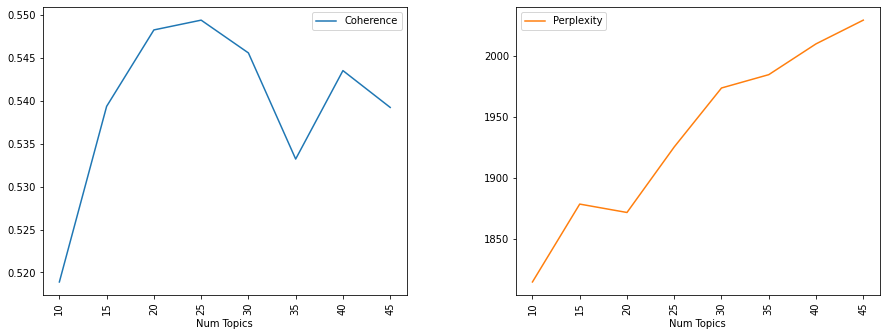

In [ ]:
fig, ax = plt.subplots(figsize=(15,5), nrows=1, ncols=2) # nrows=1 ? ncols=2?..2개 그림 배치를 어떻게?....행1개 열2개...subplots이 쪼개는 것....fig는 figsize에 관한 것....15.5가 아래 눈에 보이는 사이즈.....(가로..세로)

plt.subplots_adjust(left=0.125, #여백 간의 관계를 adjust.... 그림이 여려개 있을때 공간과 여백 설정....left=.125...반으로 쪼갠 것 내에서 배치를 어떻게...wspace는 두 그림 사이의 거리...hspace는 필요가 없다...
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

pd.pivot_table(mdl_check, values=["Perplexity", "Coherence"],index="Num Topics")\
    .plot(kind='line', rot=90, ax=ax, subplots=True)  # perplexity와 coherence의 위치? \표시는 .plot 과 연결. .plot을 어떻게 그릴거냐? 선 그래프...rotation 가로축 로테이션..위의 ax.
                                                      # subplots=True는 두개를 나눈다....
                                                      # \.plot??. 아래 상단에 나오는 array....는 뭐지? 없애도 되지 않나?

# Training Data for Best Fitted Model

In [ ]:
## Test by 15 topics

mdl = tp.LDAModel(k=20)

for text in DF['Allwords']:
    token = text.strip().split()
    if token:
        mdl.add_doc(token)
mdl.train(iter=100, workers=0)

for k in range(mdl.k):
    print('Top 10 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=10))

Top 10 words of topic #0
[('virus', 0.03632895275950432), ('case', 0.03126537799835205), ('health', 0.026631342247128487), ('state', 0.026333970949053764), ('week', 0.024500180035829544), ('country', 0.0242193304002285), ('vaccine', 0.022955501452088356), ('death', 0.01822233945131302), ('mask', 0.015818588435649872), ('month', 0.014835610054433346)]
Top 10 words of topic #1
[('trump', 0.053247179836034775), ('debate', 0.04156962409615517), ('president', 0.03929935023188591), ('night', 0.031640440225601196), ('event', 0.024346858263015747), ('moment', 0.01693584956228733), ('question', 0.015644142404198647), ('speech', 0.011769020929932594), ('campaign', 0.011103595606982708), ('audience', 0.01041207555681467)]
Top 10 words of topic #2
[('campaign', 0.1744333803653717), ('fund', 0.030545005574822426), ('state', 0.02324800007045269), ('event', 0.02314872108399868), ('money', 0.023082533851265907), ('month', 0.0211796872317791), ('candidate', 0.018714258447289467), ('week', 0.01859843358

# Visualizing Results via pyLDAvis

# pyLDAvis

* topic_term_dists: array-like, shape (n_topics, n_terms)
* Matrix of topic-term probabilities. Where n_terms is len(vocab).

* doc_topic_dists :array-like, shape (n_docs, n_topics)
* Matrix of document-topic probabilities.

* doc_lengths :array-like, shape n_docs
*The length of each document, i.e. the number of words in each document. The order of the numbers should be consistent with the ordering of the docs in doc_topic_dists.

* vocab :array-like, shape n_terms
* List of all the words in the corpus used to train the model.

* term_frequency :array-like, shape n_terms
* The count of each particular term over the entire corpus. The ordering of these counts should correspond with vocab and topic_term_dists.

In [ ]:
## Pyldavis process

topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

In [ ]:
prepared_data = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency,
    mds='mmds'
)

pyLDAvis.display(prepared_data)

## 몇몇 외래어들이 하나의 토픽을 구성하는 것 확인할 수 있음(토픽 24, 25)
## 상기한 것처럼 이러한 자료들은 직접 자료를 확인하면서 raw data를 확인하는 단계에서 제거하는 과정 필요